#### The purpose of this project is to practice some basic Data cleaning principals, and perhaps gain some insights as to the types of projects that are most successful on kickstarter.



#### First, we check for any missing values in our data set

In [147]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('ks-projects-201801.csv')

#missing data points
missing_data_points = data.isnull().sum()
percentage_missing = missing_data_points.sum()/np.product(data.shape)

print(missing_data_points)


ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64


#### Next, we need to know why the data was missing. 

Is the missing data meaningful? IE, doeos a blank value indicate something useful like a lack of financing, etc?

#### USD pledged
In this particular project, USD pledged is the result of one of the scrapers which is not accurately representing the pledged amounts. USD pledged real (after some research) is closer to the actual values, so we will drop the whole USD pledged collumn, and just use USD pledged real

#### Country Code

N,0" is an error in the KS data, for now, we will change it to N/A

#### Missing name category
For this project if a name is missing from a project we will drop it.

In [148]:
trunc_data = data.drop('usd pledged',axis=1)
trunc_data = trunc_data.drop('ID', axis = 1)
trunc_data = trunc_data.dropna()
trunc_data

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,2421.0,30000.00
2,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,45000.00
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,5000.00
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,50000.00
378657,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,1500.00
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,15000.00
378659,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,15000.00


In [149]:
chart_labels = trunc_data.main_category.unique()
chart_labels

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

Here we verify the removal of our null data

In [150]:
trunc_data.isnull().sum()

name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

#### Let's check out what projects are most posted to kickstarter
To do this we will put to work some very basic stats to determine the inner angle we will use for our chart, based on each category's percentage representation in the set.

In [151]:
label_count = []
pie_angles =[]
explode_values = []

for i in chart_labels:
    label_count.append((data['category'] == i).sum())

            
def get_angles(inlist):
    outlist = []
    for i in inlist:
        outlist.append((i/sum(inlist))*360)
    return outlist
        
pie_angles = get_angles(label_count)
    
for i in label_count:
    explode_values.append(0)



Here is where the "magic" happens. If you aren't familiar with creating pie charts, basic generation can be found here https://pythonspot.com/matplotlib-pie-chart/

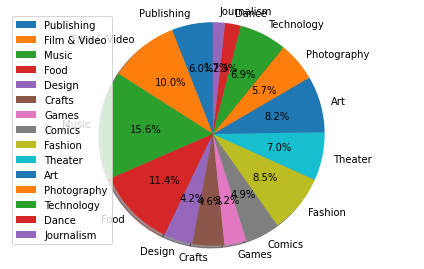

In [152]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = chart_labels
sizes = pie_angles
explode = (explode_values)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = chart_labels,explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(chart_labels,loc = 'best')
plt.tight_layout()
plt.show()

The next thing we would want to do is for each category, let's find out what the success vs. the failure rate is. 

In [153]:
ks_states = trunc_data.state.unique()
explode_values = []
sum_ks_states = []
for i in ks_states:
    sum_ks_states.append((data['state'] == i).sum())

pie_angles = get_angles(sum_ks_states)

for i in ks_states:
    explode_values.append(0)

len(explode_values)


6

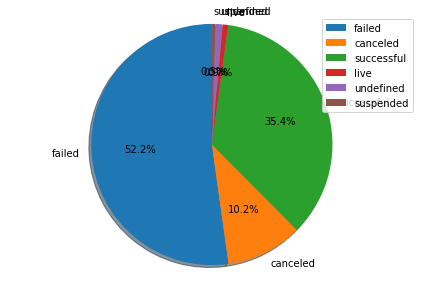

In [156]:


# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ks_states
sizes = pie_angles
explode = (explode_values)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = ks_states,explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(ks_states,loc = 'best')
plt.tight_layout()
plt.show()

<AxesSubplot:>

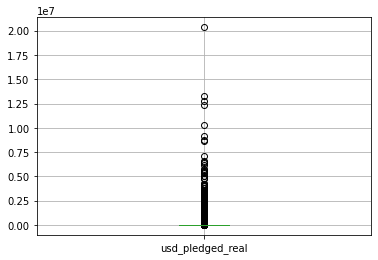

In [155]:
trunc_data.boxplot('usd_pledged_real')

For the next sectiton we will begin normalizing our data so it doesn't look terrible like the above example


c:\users\milne\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\milne\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

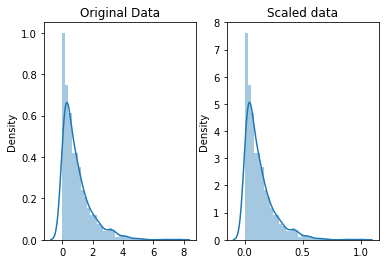

In [163]:
original_data = np.random.exponential(size = 1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns = [0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

In the above diagram you can see that only the x and Y axis have changed, they have been scaled to a more appropriate size for the project

-- 

Notice that the shape of the data doesn't change, but that instead of ranging from 0 to 8ish, it now ranges from 0 to 1.

Next we will normalize our stats, using the code below we can move it into a standard distribution curve

c:\users\milne\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\milne\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

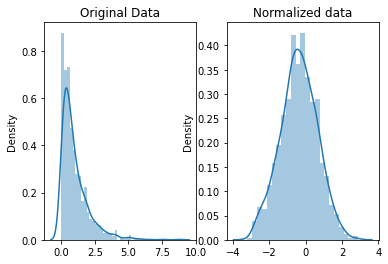

In [161]:


# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")



Now we will apply it to our model

c:\users\milne\appdata\local\programs\python\python39\lib\site-packages\mlxtend\preprocessing\scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]
c:\users\milne\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\milne\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibilit

Text(0.5, 1.0, 'Scaled data')

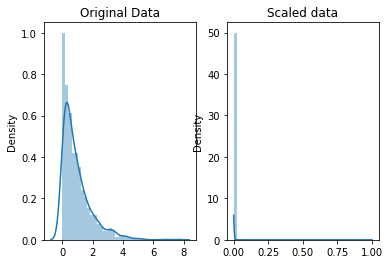

In [165]:
usd_goal = data.usd_goal_real
# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(usd_goal, columns = [0])

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

c:\users\milne\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\milne\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

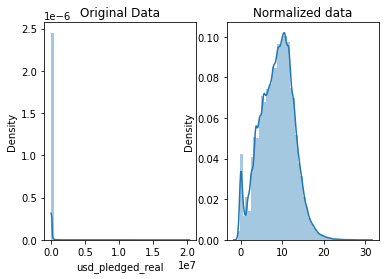

In [167]:


# get the index of all positive pledges (Box-Cox only takes postive values)
index_of_positive_pledges = data.usd_pledged_real > 0

# get only positive pledges (using their indexes)
positive_pledges = data.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")